In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
import os
from pycocotools.coco import COCO
from skimage import io

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [9]:

src_root = '/Users/ben_rss/Downloads/Deep Learning 2024-1/datasets/coco/'
src_subset = 'images/train2017'
src_file = src_root+'annotations/instances_train2017.json'
src_desc = 'train2017_coco' # a name (identifier) for the dataset

coco_obj = COCO(src_file)

loading annotations into memory...
Done (t=13.62s)
creating index...
index created!


In [10]:
# Reading the json file
with open(src_file, 'r') as f:
    root = json.load(f)

root.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [11]:
# Basic High Level Information

n_images = len(root['images'])
n_boxes = len(root['annotations'])
n_categ = len(root['categories'])

# height, width
heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]

print('Dataset Name: ',src_desc)
print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print('Max min avg height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max min avg width: ', max(widths), min(widths), int(sum(widths)/len(widths)))

Dataset Name:  train2017_coco
Number of images:  118287
Number of bounding boxes:  860001
Number of classes:  80
Max min avg height:  640 51 484
Max min avg width:  640 59 577


In [ ]:
categ_map = {x['id']: x['name'] for x in root['categories']}
# generate a random image
imgIds = [i['id'] for i in root['images']] 
catIds = [i['id'] for i in root['categories']]

['chair', 'chair', 'chair', 'chair', 'dining table', 'person', 'dining table', 'suitcase', 'car', 'chair', 'chair']


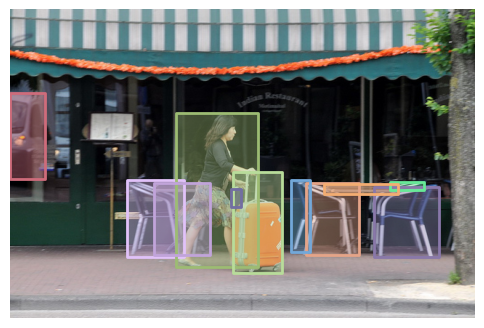

In [22]:
img = coco_obj.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_path= os.path.join(src_root, src_subset, img['file_name'])
I = io.imread(img_path) # imagen como matriz

# plot annotations
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(I) # plot de la imagen

# anotaciones de la imagen
annIds = coco_obj.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_obj.loadAnns(annIds)

#  disable segmentation
for a in anns:
    if 'segmentation' in a.keys():
        a['segmentation'] = []
coco_obj.showAnns(anns, draw_bbox=True)
classes = [categ_map[a['category_id']] for a in anns]
print(classes)

In [43]:
anns

[{'segmentation': [],
  'area': 2609.0577999999973,
  'iscrowd': 0,
  'image_id': 364082,
  'bbox': [406.7, 239.27, 72.48, 97.99],
  'category_id': 62,
  'id': 376471},
 {'segmentation': [],
  'area': 4267.386450000002,
  'iscrowd': 0,
  'image_id': 364082,
  'bbox': [500.45, 243.54, 89.77, 96.46],
  'category_id': 62,
  'id': 378122},
 {'segmentation': [],
  'area': 261.0946999999996,
  'iscrowd': 0,
  'image_id': 364082,
  'bbox': [521.89, 237.5, 47.81, 11.22],
  'category_id': 62,
  'id': 385308},
 {'segmentation': [],
  'area': 3435.2739,
  'iscrowd': 0,
  'image_id': 364082,
  'bbox': [160.37, 234.75, 78.47, 105.57],
  'category_id': 62,
  'id': 385982},
 {'segmentation': [],
  'area': 1183.1362500000005,
  'iscrowd': 0,
  'image_id': 364082,
  'bbox': [431.64, 239.84, 102.15, 14.31],
  'category_id': 67,
  'id': 414515},
 {'segmentation': [],
  'area': 10274.4947,
  'iscrowd': 0,
  'image_id': 364082,
  'bbox': [228.19, 141.84, 112.19, 212.98],
  'category_id': 1,
  'id': 448563}